### 라이브러리 로드

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
df = pd.read_csv('netflix_titles.csv')
df.head()
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### 데이터 전처리

In [7]:
# 결측치 비율 높은 director는 'Unknown'으로 대체
df['director'].fillna('Unknown', inplace=True)

# cast, country도 동일 처리
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

# date_added는 분석 타겟이 아니면 삭제도 가능
df.dropna(subset=['date_added'], inplace=True)

# rating, duration은 소수만 결측 → 행 제거
df.dropna(subset=['rating', 'duration'], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_8636\1746422973.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cast'].fillna('Unknown', inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_8636\1746422973.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [8]:
# Movie/TV Show 별 duration 처리
def clean_duration(row):
    if 'min' in row:
        return int(row.replace(' min', ''))
    elif 'Season' in row:
        return int(row.split(' ')[0])
    else:
        return 0

df['duration_cleaned'] = df['duration'].apply(clean_duration)

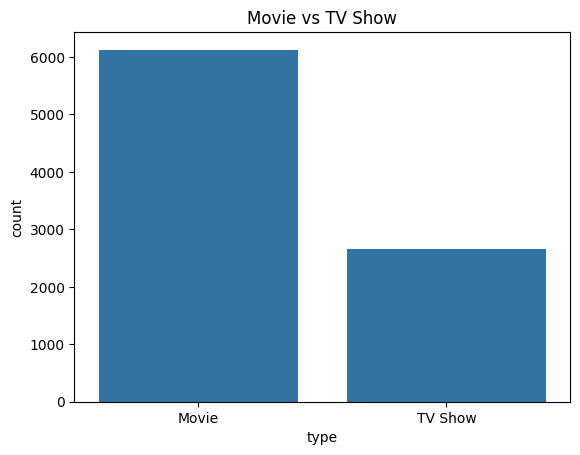

In [ ]:
sns.countplot(data=df, x='type')
plt.title("Movie vs TV Show")
plt.show()

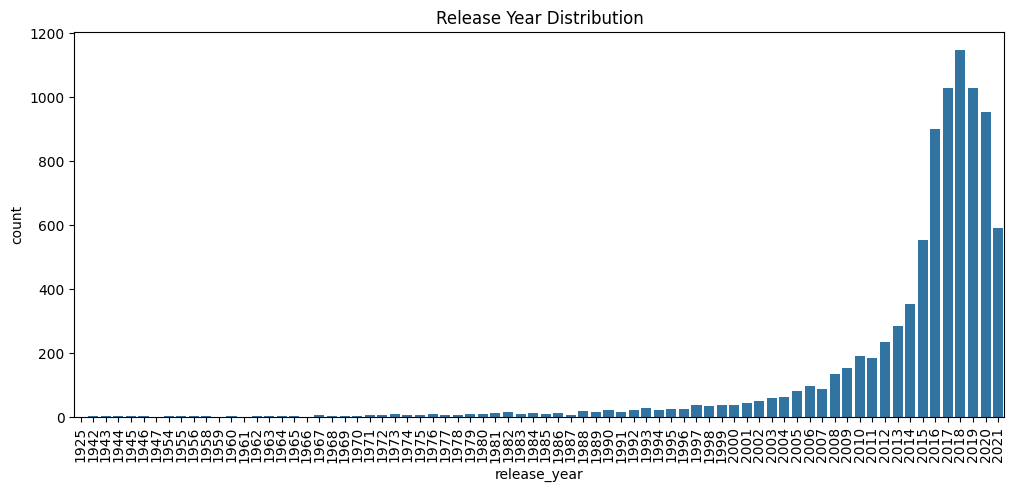

In [10]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='release_year', order=sorted(df['release_year'].unique()))
plt.xticks(rotation=90)
plt.title("Release Year Distribution")
plt.show()


In [11]:
df_model = df[['type', 'release_year', 'duration_cleaned', 'country', 'rating', 'listed_in']]

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_model['type_encoded'] = le.fit_transform(df_model['type'])  # Movie:0, TV Show:1

C:\Users\User\AppData\Local\Temp\ipykernel_8636\3615234536.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['type_encoded'] = le.fit_transform(df_model['type'])  # Movie:0, TV Show:1


In [13]:
df_model = pd.get_dummies(df_model, columns=['country', 'rating', 'listed_in'], drop_first=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# X, y 나누기
X = df_model.drop(columns=['type', 'type_encoded'])
y = df_model['type_encoded']

# 학습/테스트 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 정규화 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 모델 정의 및 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1225
           1       1.00      1.00      1.00       533

    accuracy                           1.00      1758
   macro avg       1.00      1.00      1.00      1758
weighted avg       1.00      1.00      1.00      1758

[[1224    1]
 [   0  533]]


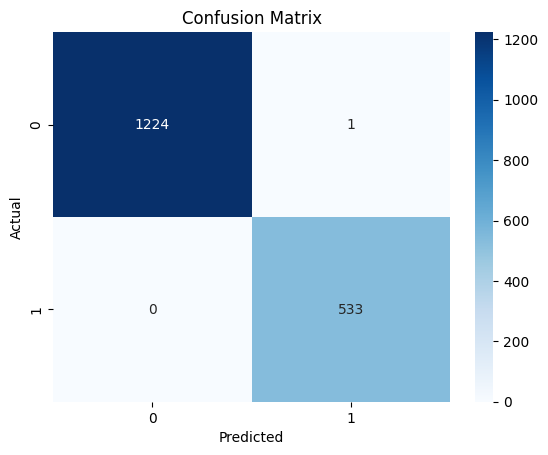

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1225
           1       1.00      1.00      1.00       533

    accuracy                           1.00      1758
   macro avg       1.00      1.00      1.00      1758
weighted avg       1.00      1.00      1.00      1758



In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
}

rf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(rf, param_grid=params, cv=3, scoring='f1', verbose=1, n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.9978884758941021
